<h1>Opgave II. Download filen ”Tilfredsheds undersøgelsen)</h1>
1) Lav frekvenstabel og søjlediagram for ”Primær Bank” variabel<br>
2) Beregn gennemsnitlig tilfredshed og standardafvigelse for alle i stikprøven (i Excel: =middel(..), =stdafv.s( )<br>
3) Beregn gennemsnitlig tilfredshed for hver bank kategori (nu med Pivot funktioner). Hvilken bank har mest tilfredse og mest utilfredse kunder? (Lav en søjlediagram)<br> 
4) Beregn gennemsnitlig alder og standard afvigelsen for alder for alle i stikprøven.<br>
5) Beregn gennemsnitlig alder for hver bank kategori. Hvilken bank har mest tilfredse og mest utilfredse kunder? (Lav en søjlediagram) <br>

In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')

In [28]:
df = pd.read_excel("./Tilfredshed bank.xlsx", "Complete")

In [29]:
df

,Hvad er din primære bank?,"På en skala fra 1 til 10, hvor tilfreds er du alt i alt med din primære bank? (1=Meget Utilfreds, 10=Meget Tilfreds)",Hvad er din alder? (tast din alder ind),E-mail,Samlet status - Ny,Samlet status - Distribueret,Samlet status - Nogen svar,Samlet status - Gennemført,Samlet status - Frafaldet
0,Nykredit,3.0,22.0,NaN,0,0,0,1,0
1,Andet,7.0,24.0,NaN,0,0,0,1,0
2,Danske Bank,8.0,23.0,NaN,0,0,0,1,0
3,Sydbank,10.0,NaN,NaN,0,0,0,1,0
4,Danske Bank,6.0,NaN,NaN,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
195,Jyske Bank,6.0,23.0,NaN,0,0,0,1,0
196,Andet,9.0,24.0,NaN,0,0,0,1,0
197,Andet,10.0,21.0,NaN,0,0,0,1,0
198,Nordea,7.0,26.0,NaN,0,0,0,1,0


In [30]:
df = df[['Hvad er din primære bank?',
       'På en skala fra 1 til 10, hvor tilfreds er du alt i alt med din primære bank? (1=Meget Utilfreds, 10=Meget Tilfreds)',
       'Hvad er din alder? (tast din alder ind)'
        # 'E-mail',
       # 'Samlet status - Ny', 'Samlet status - Distribueret',
       # 'Samlet status - Nogen svar', 'Samlet status - Gennemført',
       # 'Samlet status - Frafaldet'
   ]].copy()

In [31]:
df = df.rename(columns={'Hvad er din primære bank?':'bank',
       'På en skala fra 1 til 10, hvor tilfreds er du alt i alt med din primære bank? (1=Meget Utilfreds, 10=Meget Tilfreds)':'skala',
       'Hvad er din alder? (tast din alder ind)':'alder'})

In [32]:
df

,bank,skala,alder
0,Nykredit,3.0,22.0
1,Andet,7.0,24.0
2,Danske Bank,8.0,23.0
3,Sydbank,10.0,NaN
4,Danske Bank,6.0,NaN
...,...,...,...
195,Jyske Bank,6.0,23.0
196,Andet,9.0,24.0
197,Andet,10.0,21.0
198,Nordea,7.0,26.0


# 1) Lav frekvenstabel og søjlediagram for ”Primær Bank” variabel<br>

In [75]:
banker = df['bank'].value_counts(normalize=True).head(10)

In [84]:
round(banker * 100,2)

Danske Bank             31.63
Andet                   23.98
Nordea                  19.39
Sydbank                 11.22
Jyske Bank               6.12
Nykredit                 4.08
Arbejdernes Landsank     3.57
Name: bank, dtype: float64

<AxesSubplot: >

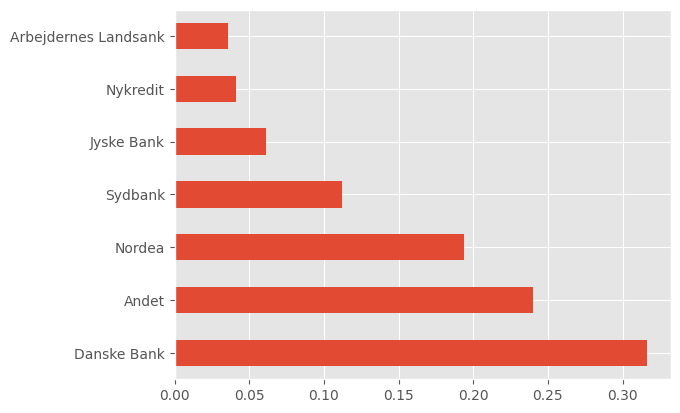

In [152]:
df['bank'].value_counts(normalize=True).head(10).plot(kind='barh')

# 2) Beregn gennemsnitlig tilfredshed og standardafvigelse for alle i stikprøven (i Excel: =middel(..), =stdafv.s( )<br>

In [176]:
round(df['skala'].describe(),2)

count    192.00
mean       7.10
std        2.07
min        1.00
25%        6.00
50%        7.00
75%        8.00
max       10.00
Name: skala, dtype: float64

In [97]:
round(df['skala'].std(),2)

2.07

In [98]:
round(df['skala'].mean(),2)

7.1

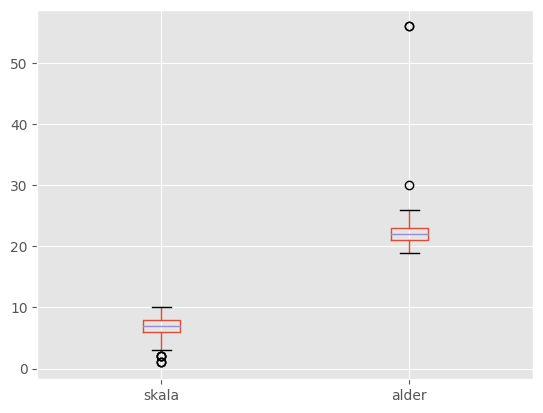

In [153]:
# Plot the box plot of single column of DataFrame
box_plot = df.boxplot()
box_plot.plot()
plt.show() 

# 3) Beregn gennemsnitlig tilfredshed for hver bank kategori (nu med Pivot funktioner). Hvilken bank har mest tilfredse og mest utilfredse kunder? (Lav en søjlediagram)<br> 

In [207]:
bank = df[['bank','skala']].groupby('bank').mean().sort_values(by=['skala','bank'])

In [209]:
bank.unstack().to_frame().style.background_gradient(cmap="Greens", axis=0)

<AxesSubplot: ylabel='bank'>

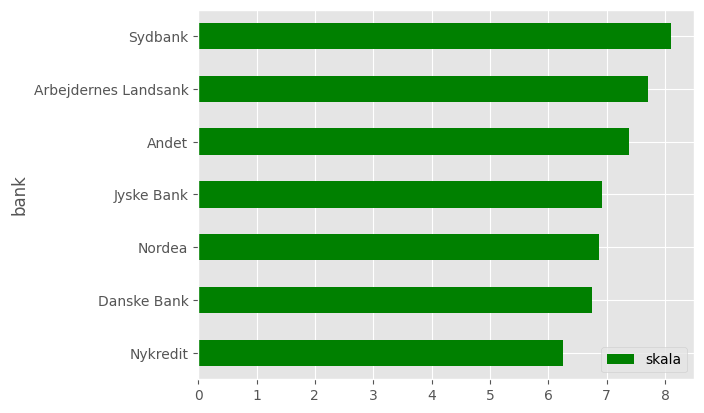

In [226]:
bank.plot(kind='barh', color='green')

# 4) Beregn gennemsnitlig alder og standard afvigelsen for alder for alle i stikprøven.<br>

In [233]:
df['alder'].describe()

count    102.000000
mean      22.931373
std        5.044868
min       19.000000
25%       21.000000
50%       22.000000
75%       23.000000
max       56.000000
Name: alder, dtype: float64

In [247]:
std = df['alder'].std()
gns = df['alder'].mean()
print(" Standard afvigelsen for alder = ",round(std,2),"\n","Gennemsnitlig alder = ", round(gns,2))

 Standard afvigelsen for alder =  5.04 
 Gennemsnitlig alder =  22.93


# 5) Beregn gennemsnitlig alder for hver bank kategori. Hvilken bank har mest tilfredse og mest utilfredse kunder? (Lav en søjlediagram) <br>

In [292]:
bankerman = df[['bank','skala','alder']].groupby('bank').mean().sort_values(by=['alder','skala'])

In [293]:
bankerman.style.background_gradient(cmap="Greens", axis=0)

,skala,alder
bank,,
Arbejdernes Landsank,7.714286,20.000000
Jyske Bank,6.916667,21.750000
Danske Bank,6.750000,22.214286
Andet,7.382979,22.444444
Sydbank,8.095238,22.583333
Nykredit,6.250000,23.333333
Nordea,6.864865,24.730769


<AxesSubplot: xlabel='bank'>

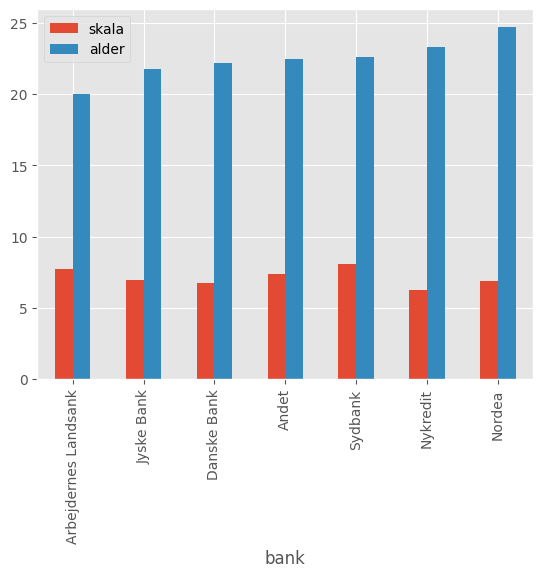

In [294]:
bankerman.plot(kind='bar')